Import all the necessary libraries.

In [78]:
import numpy as np
import pandas as pd

# plotting modules
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import plotly as plotly
plotly.offline.init_notebook_mode()

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve

# Framing the problem

The goal of this lab is to run a good EDA on fMNIST, train a neural network using Tensorflow, evaluate it using sklearn, and provide clear conclusions.

# Getting the data

For this report, we will get the data from [Kaaggle.](https://www.kaggle.com/code/abhishekyana/fmnist-dataset-with-cnns-tensorflow/data?select=fashion-mnist_test.csv). The dataset are already separated into test and train sets.

In [79]:
train = pd.read_csv('../../dataset/fashion-mnist_train.csv')
test = pd.read_csv('../../dataset/fashion-mnist_test.csv')
display(train.head())
display(test.head())

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8   
0      2       0       0       0       0       0       0       0       0  \
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780   
0       0  ...         0         0         0         0         0         0  \
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8   
0      0       0       0       0       0       0       0       0       9  \
1      1       0       0       0       0       0       0       0       0   
2      2       0       0       0       0       0       0      14      53   
3      2       0       0       0       0       0       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780   
0       8  ...       103        87        56         0         0         0  \
1       0  ...        34         0         0         0         0         0   
2      99  ...         0         0         0         0        63        53   
3       0  ...       137       126       140         0       133       224   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2        31         0         0         0  
3       222        56         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

# Exploratory Data Analysis

## Exploring and Describing the data

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

Now let us take a look at our data.

In [80]:
# combine the train and test data
data = pd.concat([train, test], axis=0)
data = data.sample(frac=1).reset_index(drop=True)
data

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8   
0          5       0       0       0       0       0       0       0       0  \
1          4       0       0       0       0       0       0       0       0   
2          6       0       0       0       0       0       0       0       0   
3          9       0       0       0       0       0       0       0       0   
4          3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995      4       0       0       0       0       0       0       0       0   
69996      1       0       0       0       0       0       0       0       0   
69997      2       0       0       0       0       3       0       0       0   
69998      9       0       0       0       0       0       0       0       0   
69999      9       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779   
0           0  ...         0         0         0         0         0  \
1           0  ...         0         0         0         0        19   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           1  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
69995       0  ...         0         0         0        19        35   
69996       0  ...        67         0         0         0         0   
69997       0  ...         0         0         0         0       106   
69998       0  ...         0         0         0         0         0   
69999       0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0             0         0         0         0         0  
1            38         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
69995         7        14         0         0         0  
69996         0         0         0         0         0  
69997        22        19         0         0         0  
69998         0         0         0         0         0  
69999         0         0         0         0         0  

[70000 rows x 785 columns]

As we can see, our dataset set consists of 70,000 rows and 785 columns (1 label column and 784 features).

Each feature column represents a single pixel on a 28 by 28 image frame.

The value of each column on a given sample is the "degree of blackness/whiteness" of the pixel, a value from 0 to 256.

In [81]:
# split the data into features and target
X = data.drop('label', axis=1)
y = data['label']

y

0        5
1        4
2        6
3        9
4        3
        ..
69995    4
69996    1
69997    2
69998    9
69999    9
Name: label, Length: 70000, dtype: int64

Our target is a label of digits 1 to 9, representing a clothing item.

Let us visualize this below. To display our features, we will need to reshape the row and render it in image form.

In [82]:
X

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9   
0           0       0       0       0       0       0       0       0       0  \
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       1   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       3       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779   
0            0  ...         0         0         0         0         0  \
1            0  ...         0         0         0         0        19   
2            0  ...         0         0         0         0         0   
3            0  ...         0         0         0         0         0   
4            0  ...         0         0         0         0         0   
...        ...  ...       ...       ...       ...       ...       ...   
69995        0  ...         0         0         0        19        35   
69996      154  ...        67         0         0         0         0   
69997        0  ...         0         0         0         0       106   
69998        0  ...         0         0         0         0         0   
69999        0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0             0         0         0         0         0  
1            38         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
69995         7        14         0         0         0  
69996         0         0         0         0         0  
69997        22        19         0         0         0  
69998         0         0         0         0         0  
69999         0         0         0         0         0  

[70000 rows x 784 columns]

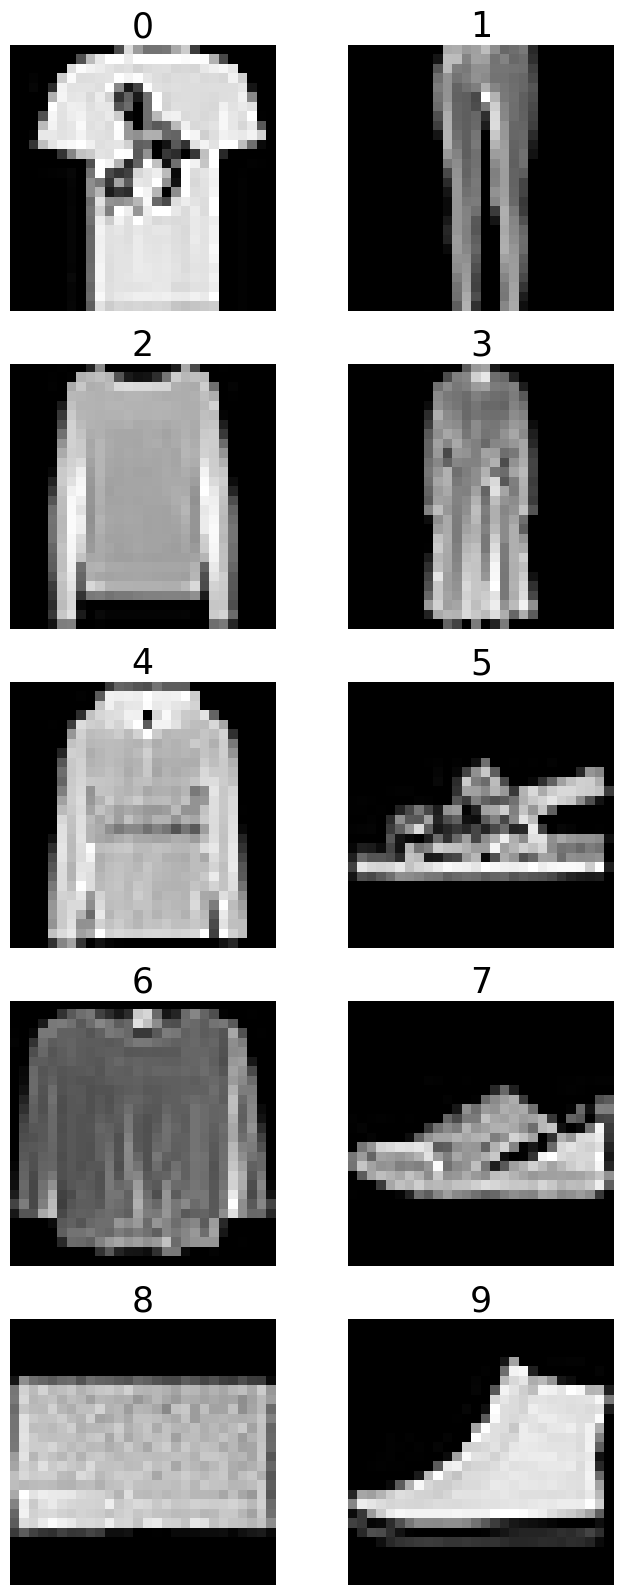

In [83]:
fig , axes  = plt.subplots(5, 2, figsize=(8,20))
axes   = axes.flatten()

# Create a dictionary that maps each unique label to its first occurrence
label_to_first_occurrence = {label: np.where(y == label)[0][0] for label in np.unique(y)}

# Sort the dictionary by key to ensure consistent ordering
label_to_first_occurrence = dict(sorted(label_to_first_occurrence.items()))

# Get the indices of the first 10 unique labels
idx = list(label_to_first_occurrence.values())[:10]

for i in range(10):
    img = X.iloc[idx[i], :].to_numpy().reshape(28,28)
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off') # hide the axes ticks
    axes[i].set_title(str(int(y[idx[i]])), color='black', fontsize=25)
plt.show()

and now the corresponding item name.

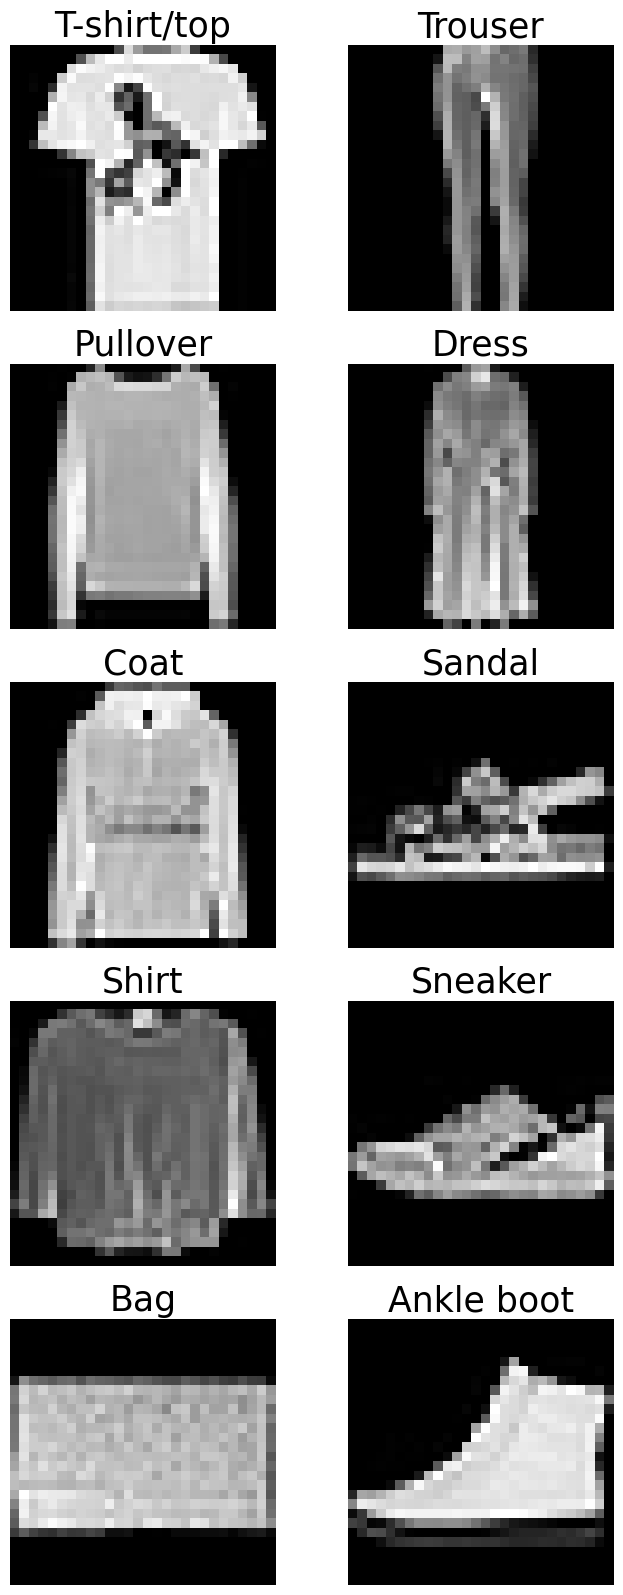

In [84]:
fig , axes  = plt.subplots(5, 2, figsize=(8,20))
axes   = axes.flatten()

label_to_first_occurrence = {label: np.where(y == label)[0][0] for label in np.unique(y)}

label_to_first_occurrence = dict(sorted(label_to_first_occurrence.items()))

idx = list(label_to_first_occurrence.values())[:10]

label_names = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
               5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

for i in range(10):
    img = X.iloc[idx[i], :].to_numpy().reshape(28,28)
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off') # hide the axes ticks
    label_number = int(y[idx[i]])
    axes[i].set_title(label_names[label_number], color='black', fontsize=25)
plt.show()

In [85]:
def visualize_input(i, ax, y):
    img = X.iloc[i].to_numpy().reshape(28,28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"{label_names[y[i]]}")
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')
    ax.set_xticks([])
    ax.set_yticks([])



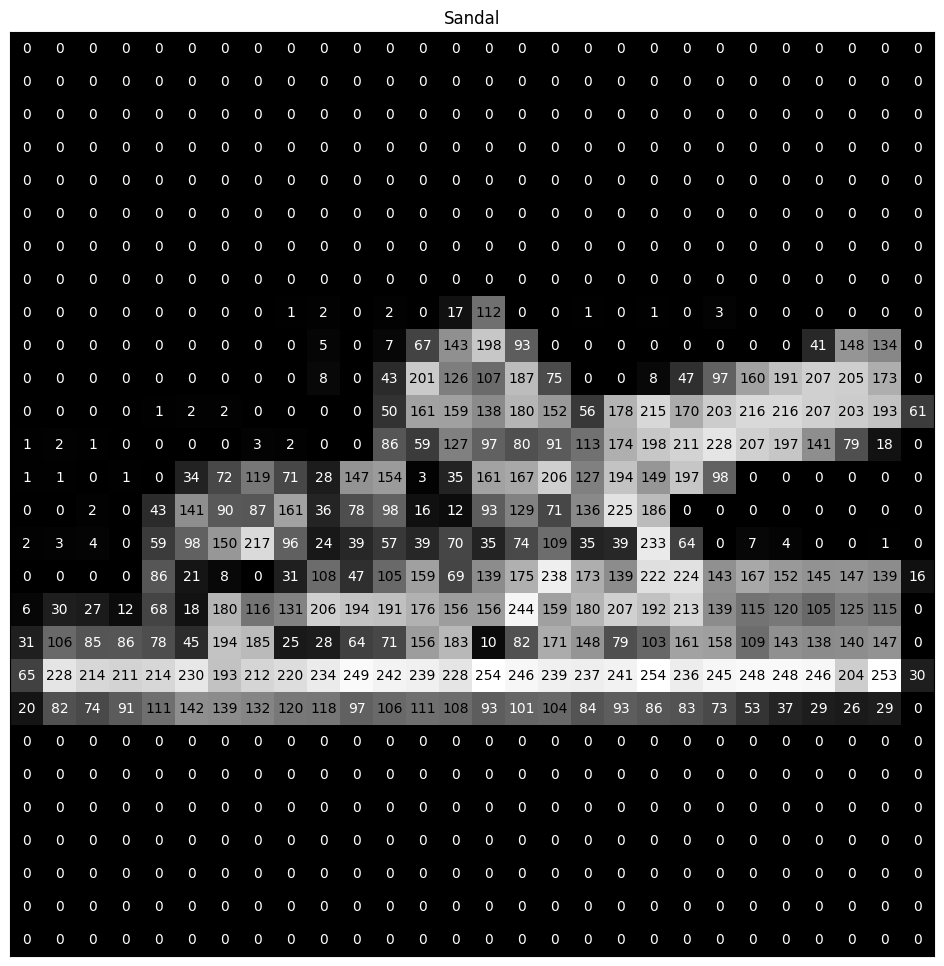

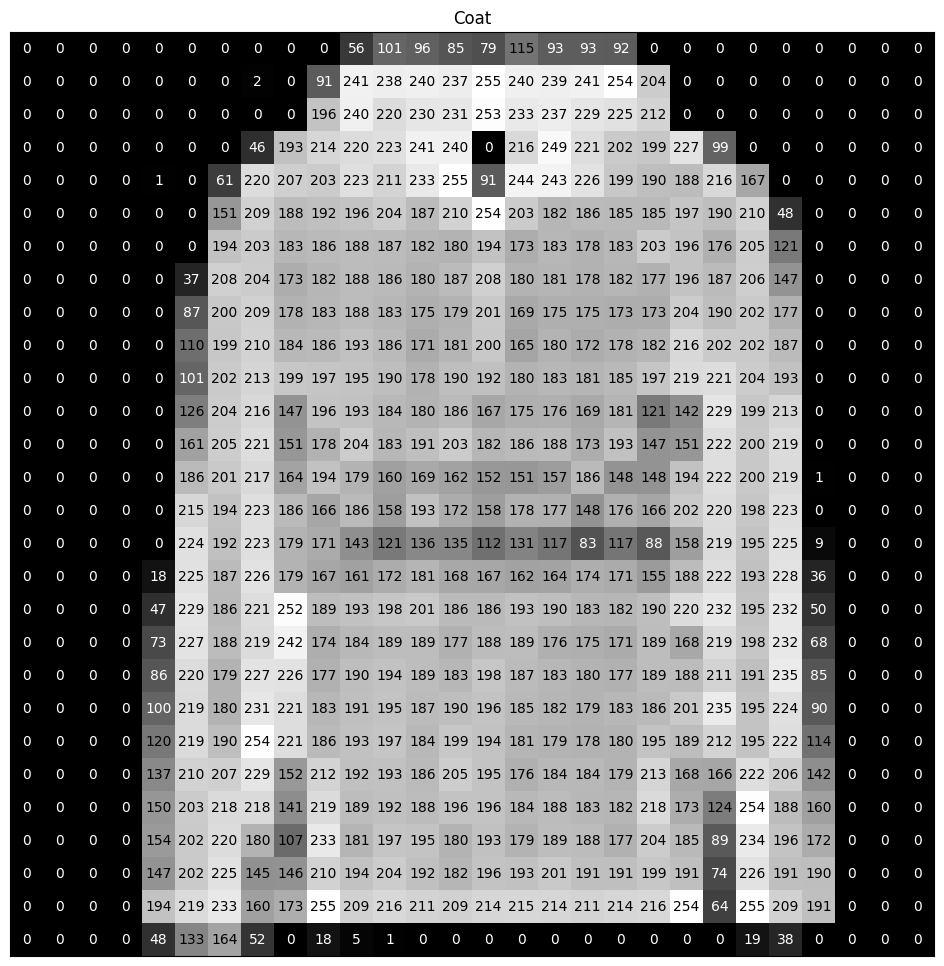

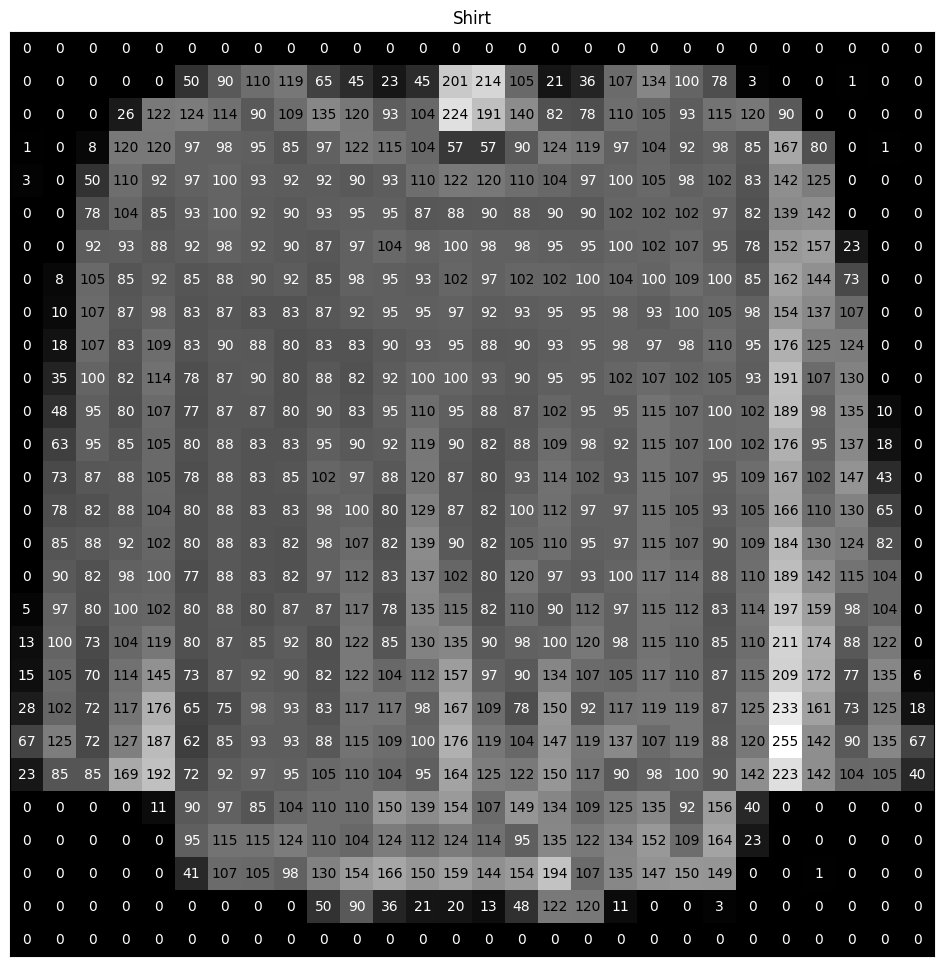

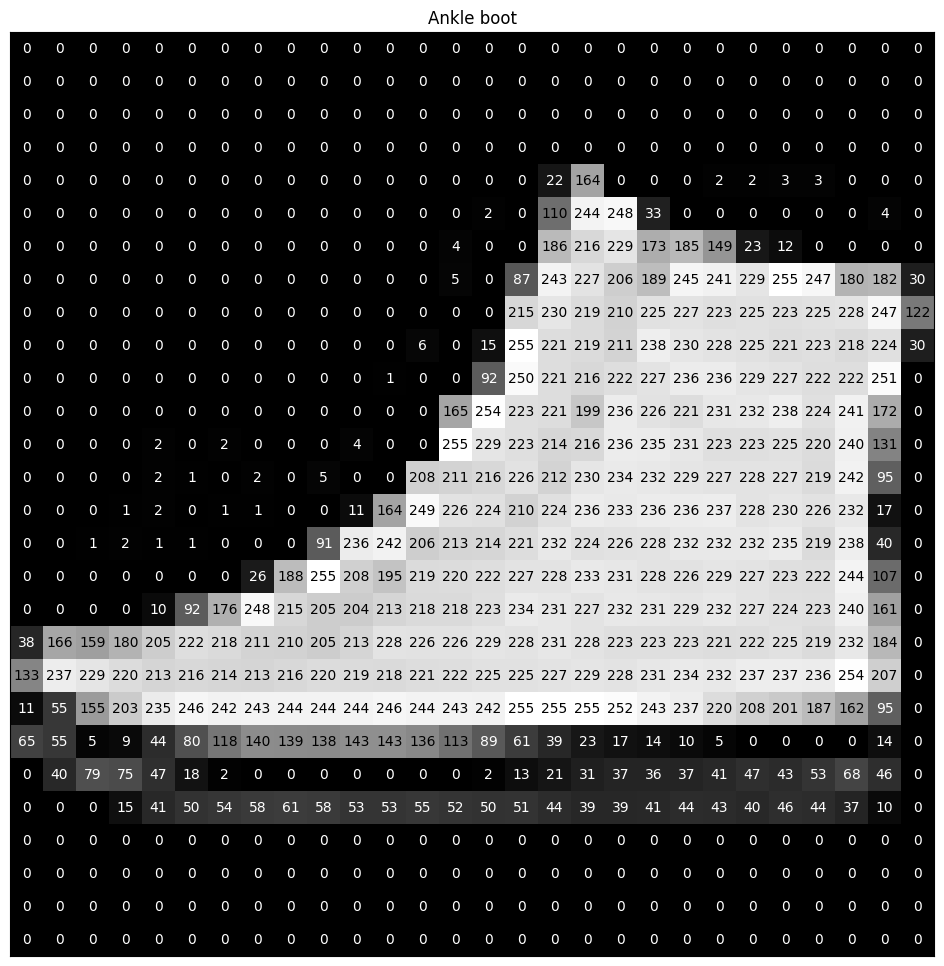

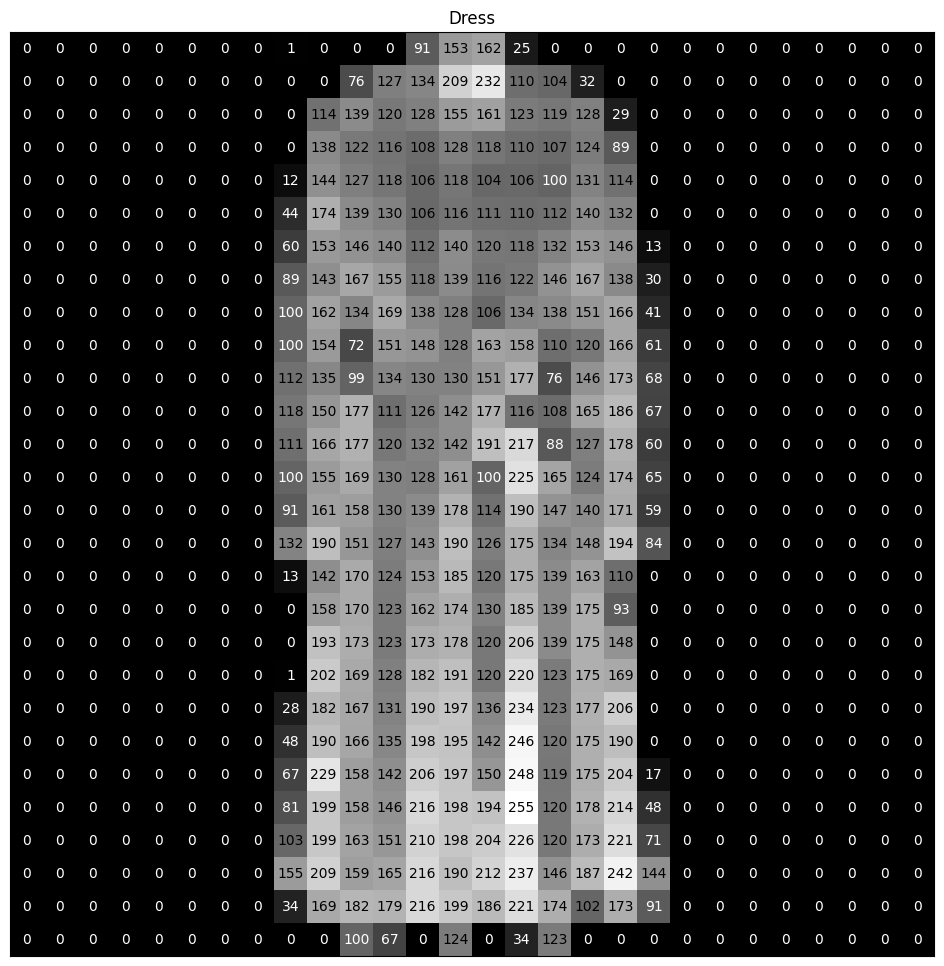

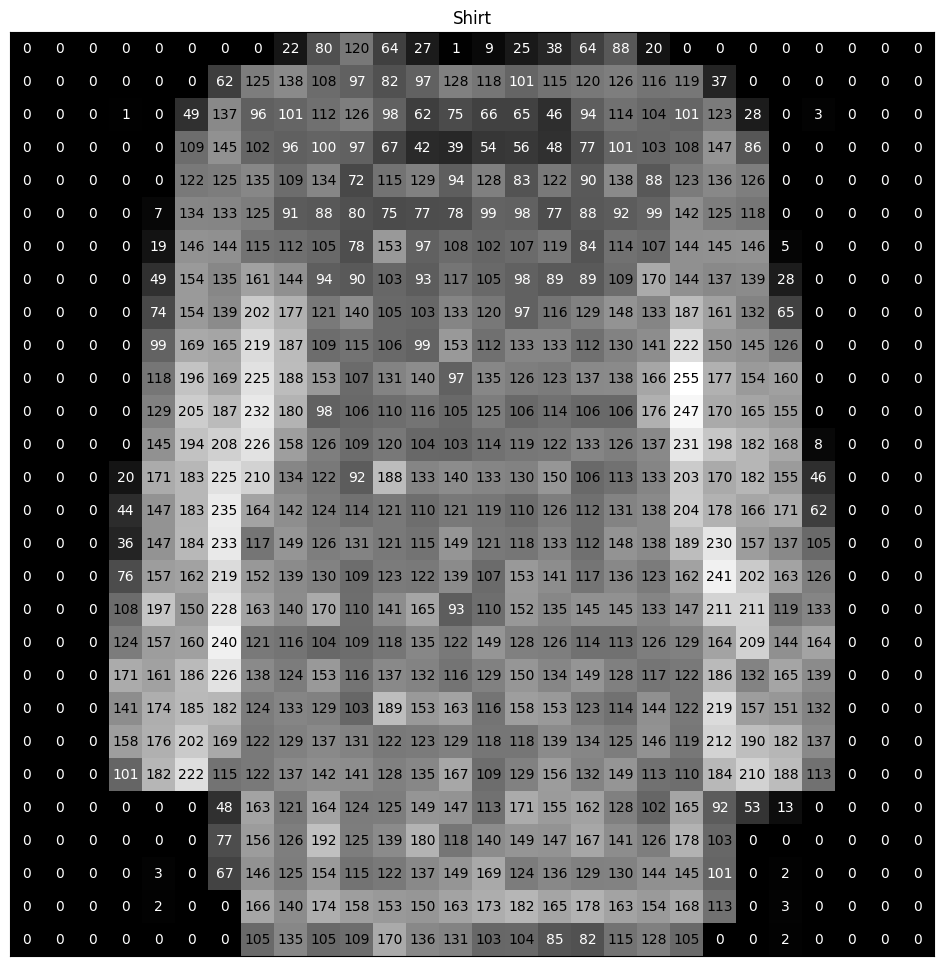

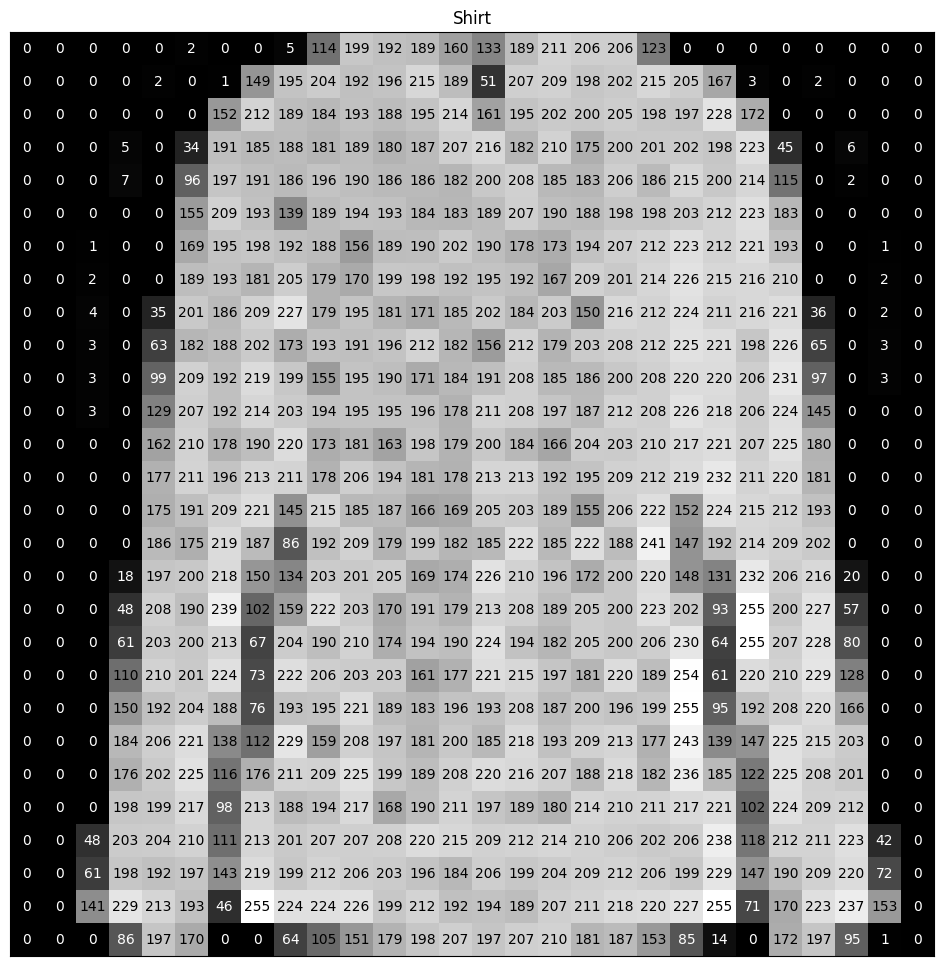

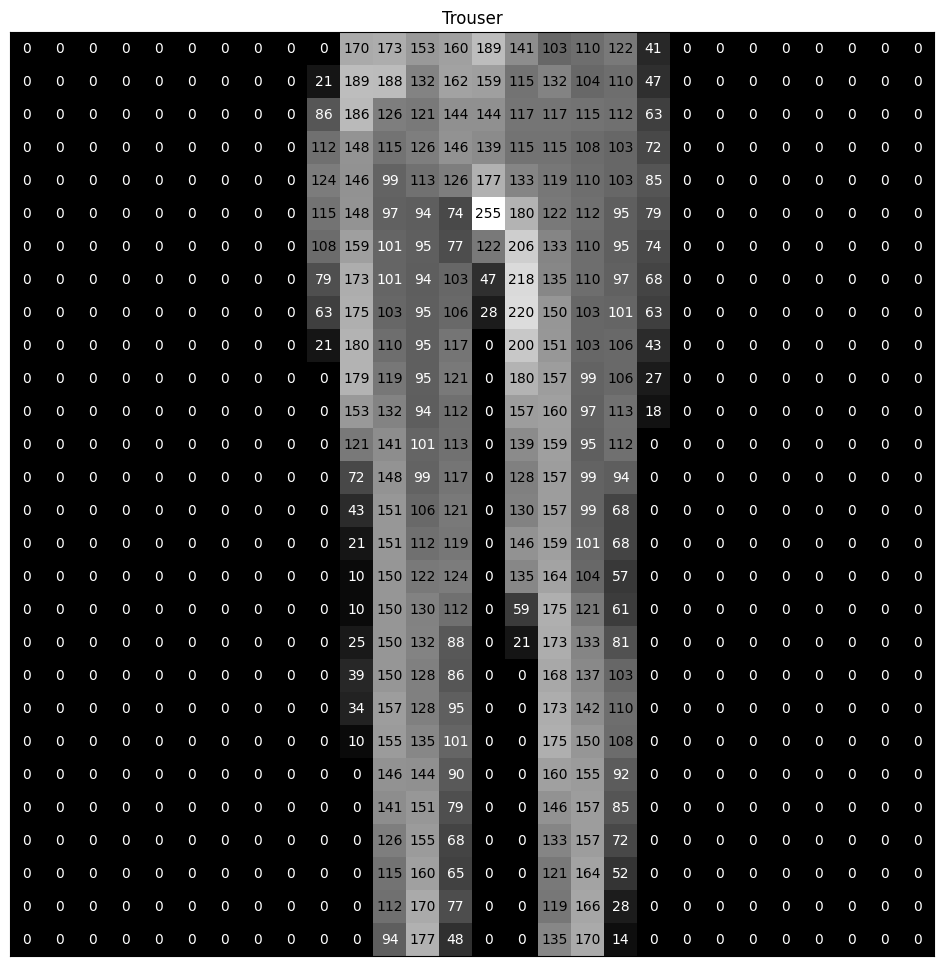

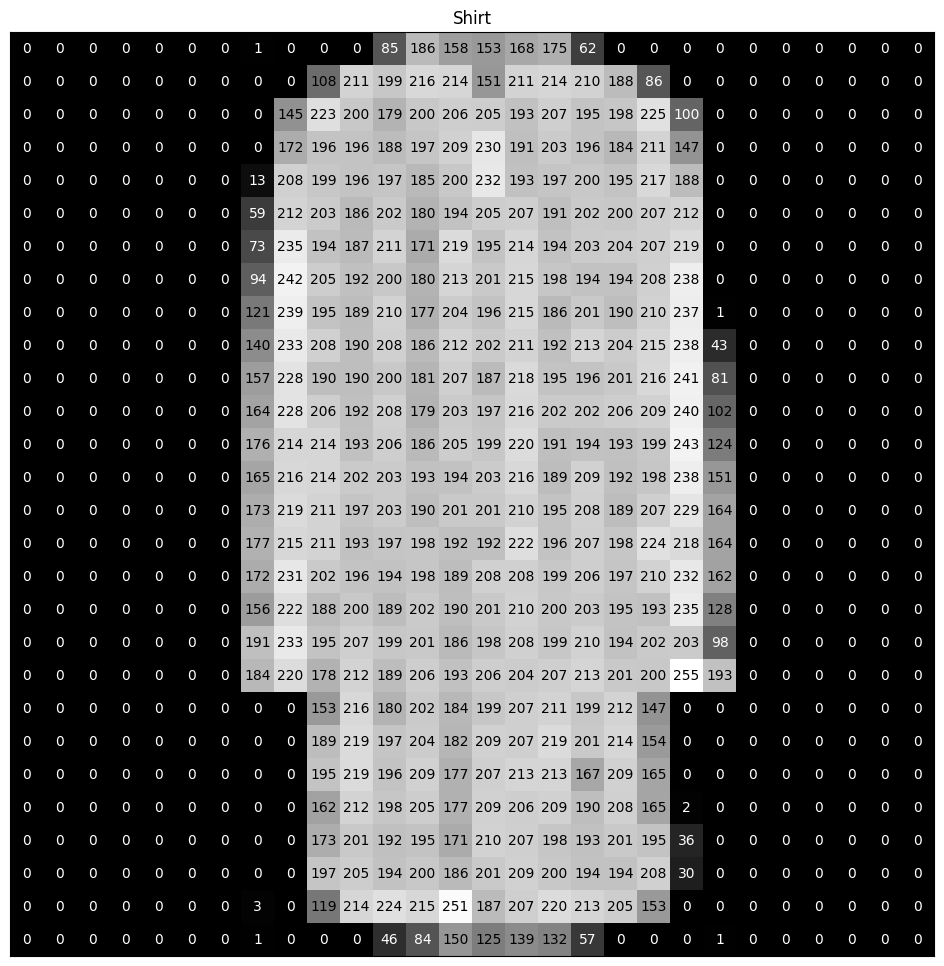

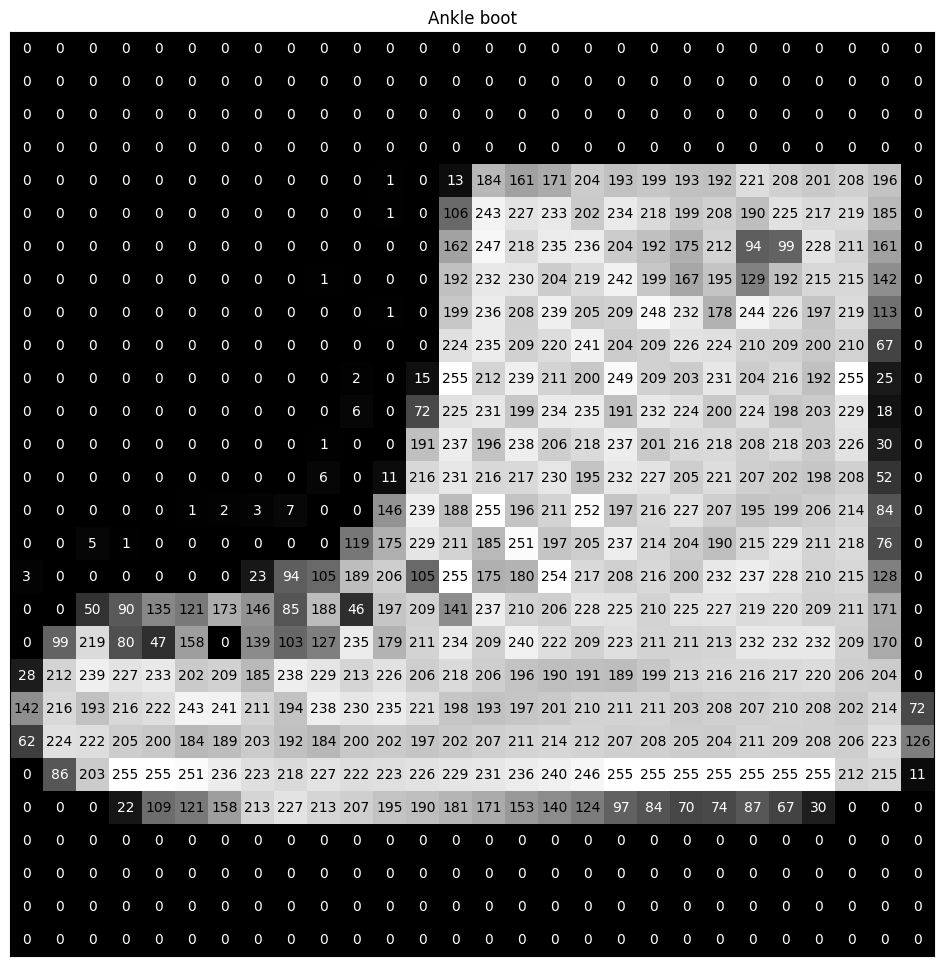

In [86]:
for i in range(10):
    fig = plt.figure(figsize = (12,12)) 
    ax = fig.add_subplot(111)
    visualize_input(i, ax, y)
    
    

In [87]:
import plotly.express as px

# Create a new column in the DataFrame that maps the numerical labels to their names
data['label_name'] = data['label'].map(label_names) + ' (' + data['label'].astype(str) + ')'

# Create the pie chart
fig = px.pie(data, names='label_name', title='Distribution of the labels')

# Make the chart bigger
fig.update_layout(width=800, height=800)

fig.show()

Our labels are evenly distributed. We have an equal number of samples for each of the classes.

Text(0.5, 1.0, 'Distribution of pixel values in the first image')

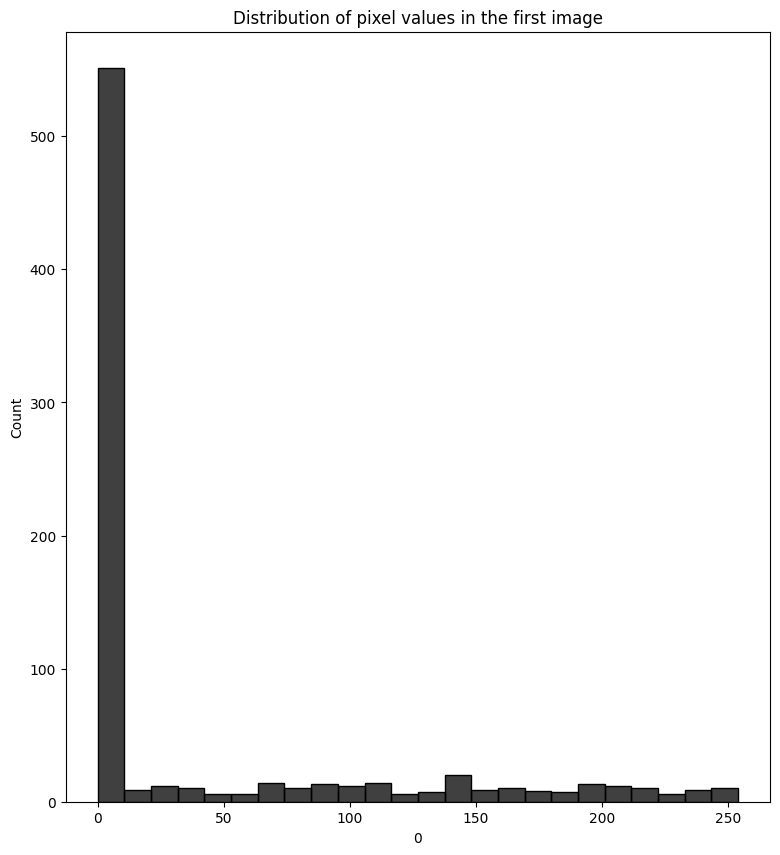

In [88]:
fig = plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.histplot(X.iloc[0], color='black')
plt.title('Distribution of pixel values in the first image')


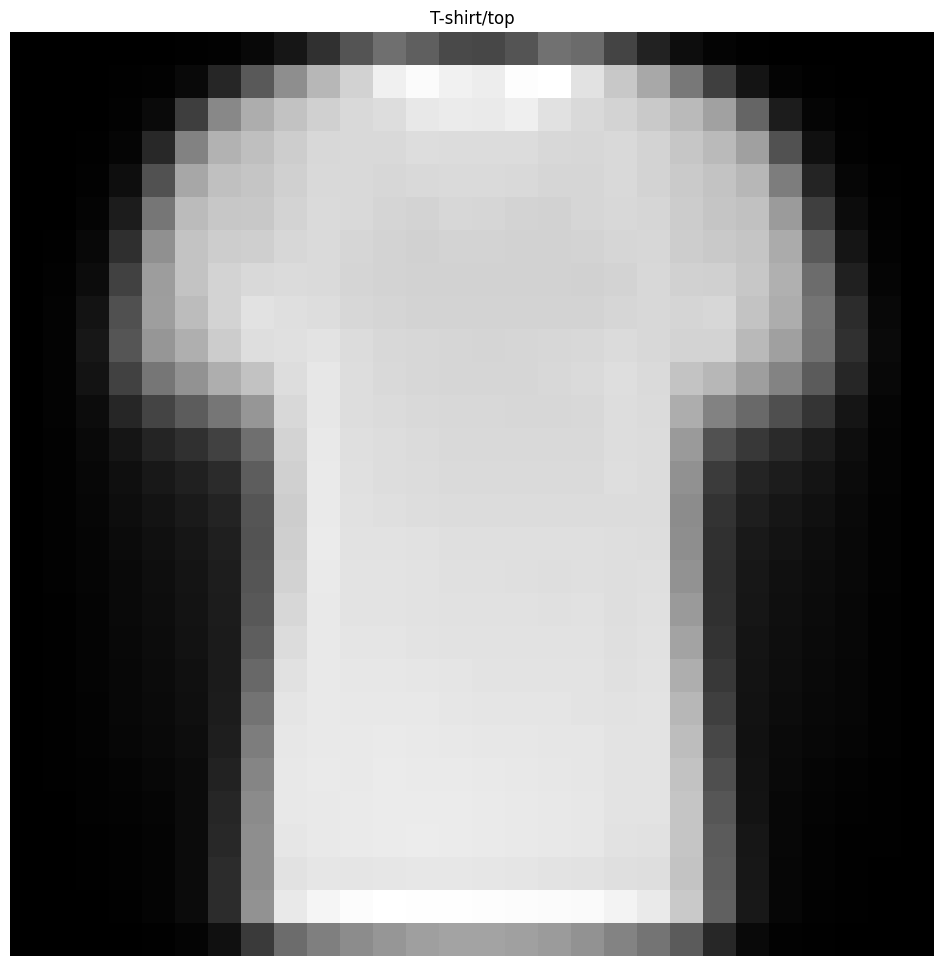

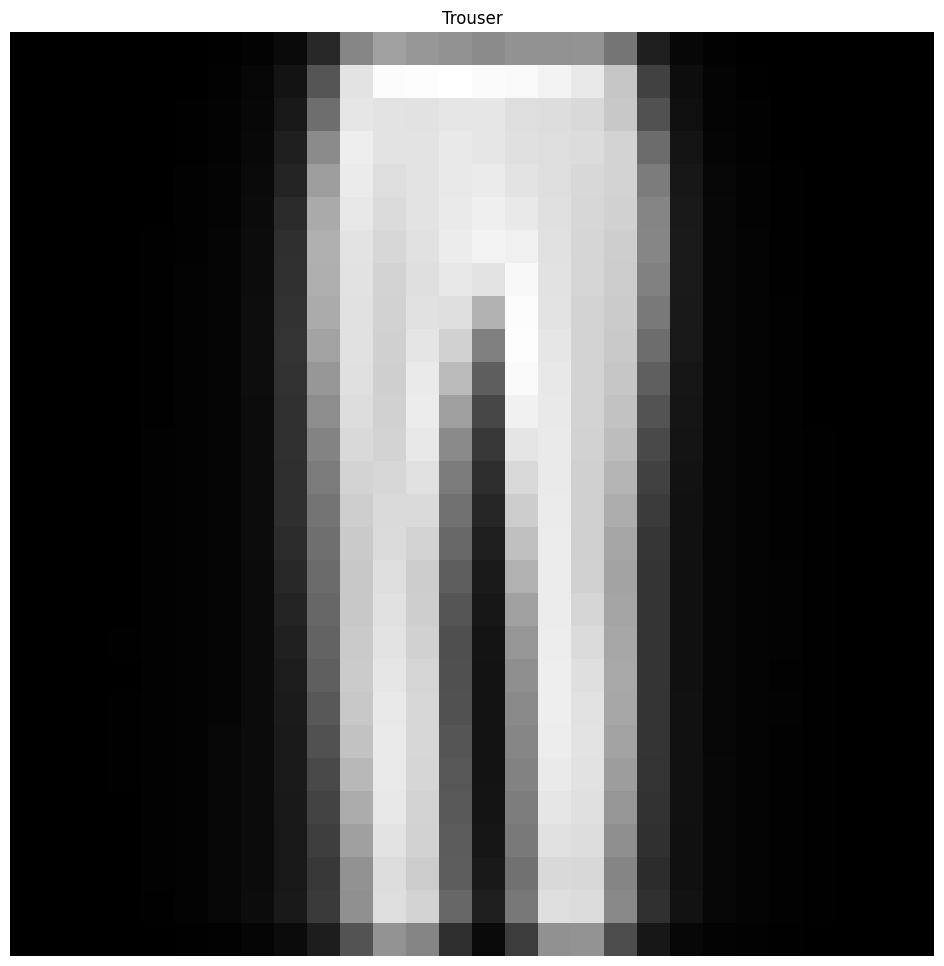

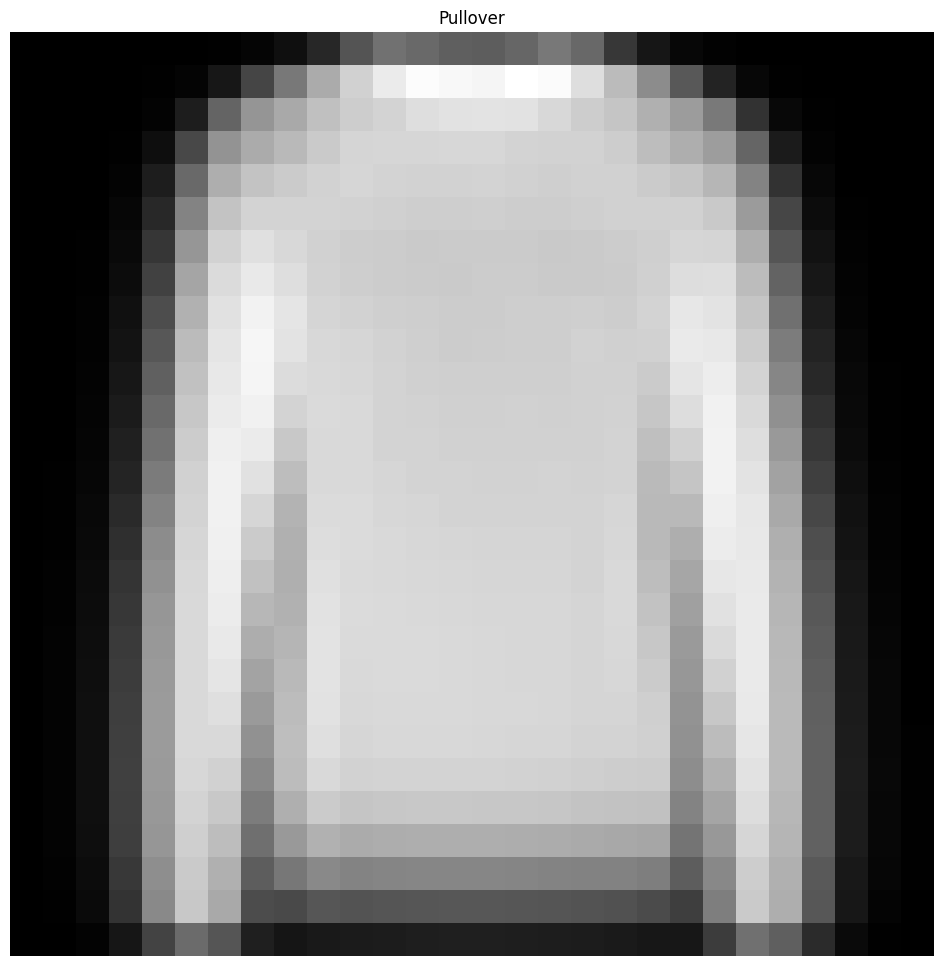

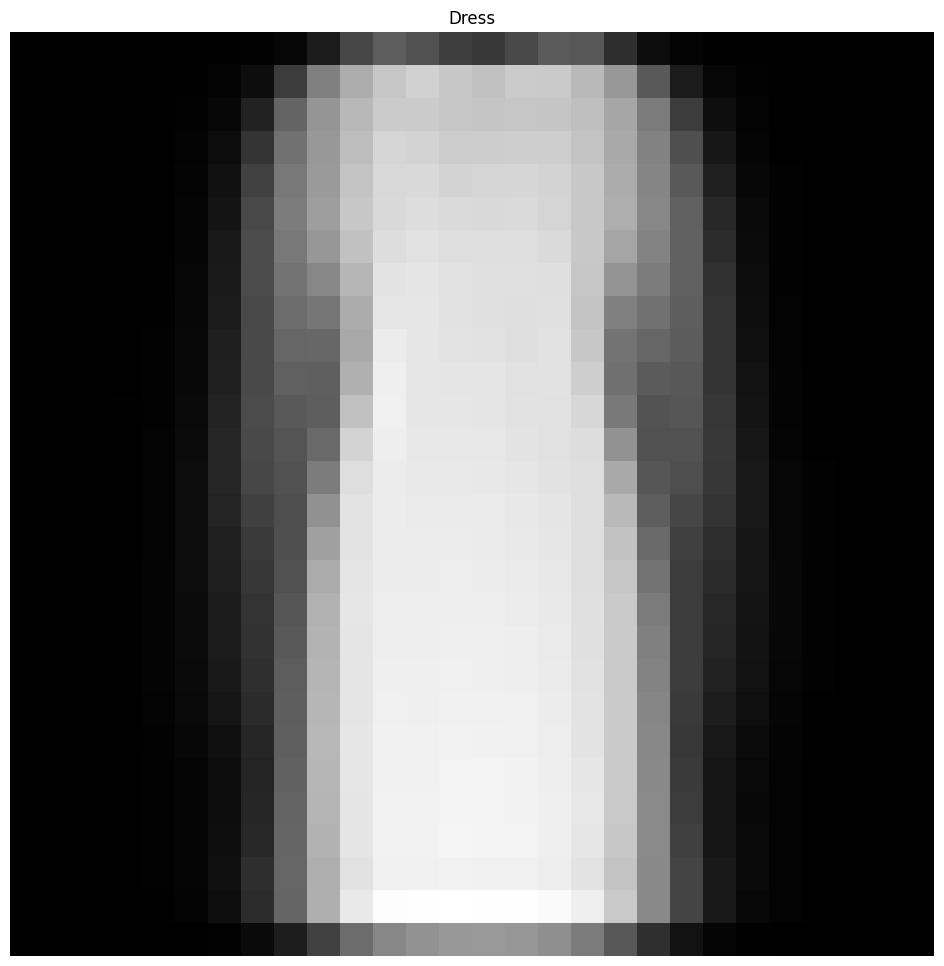

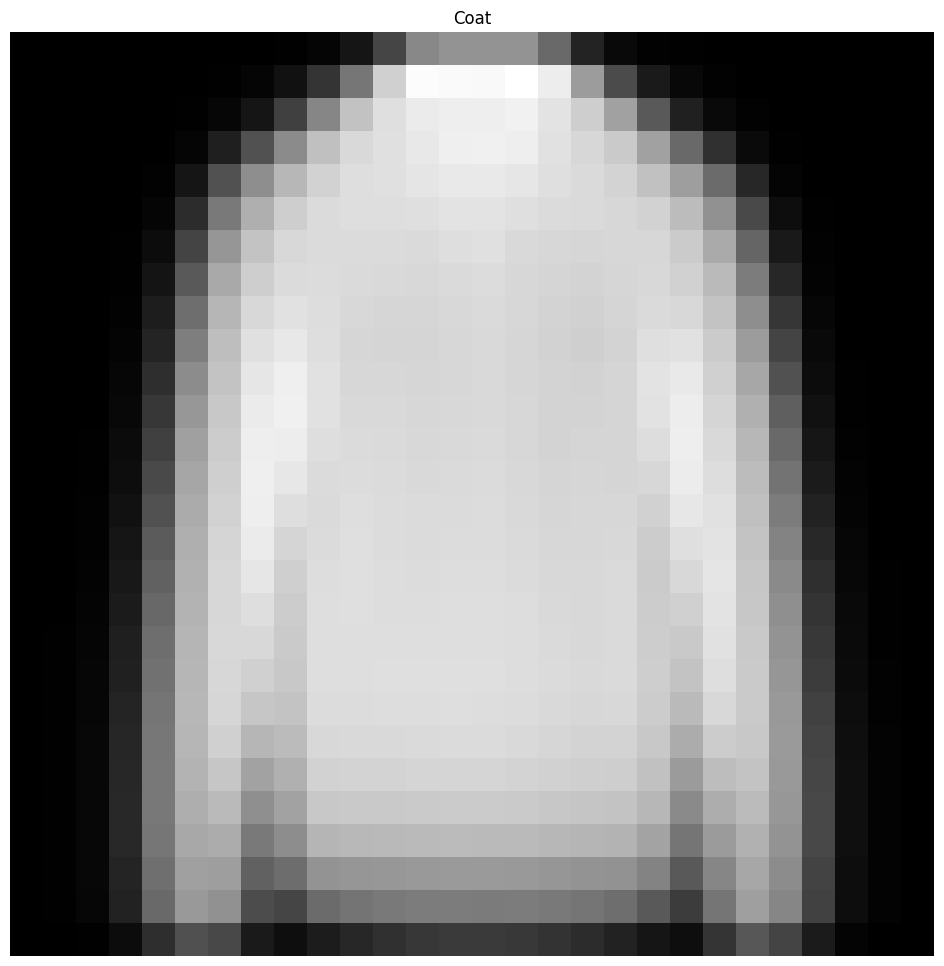

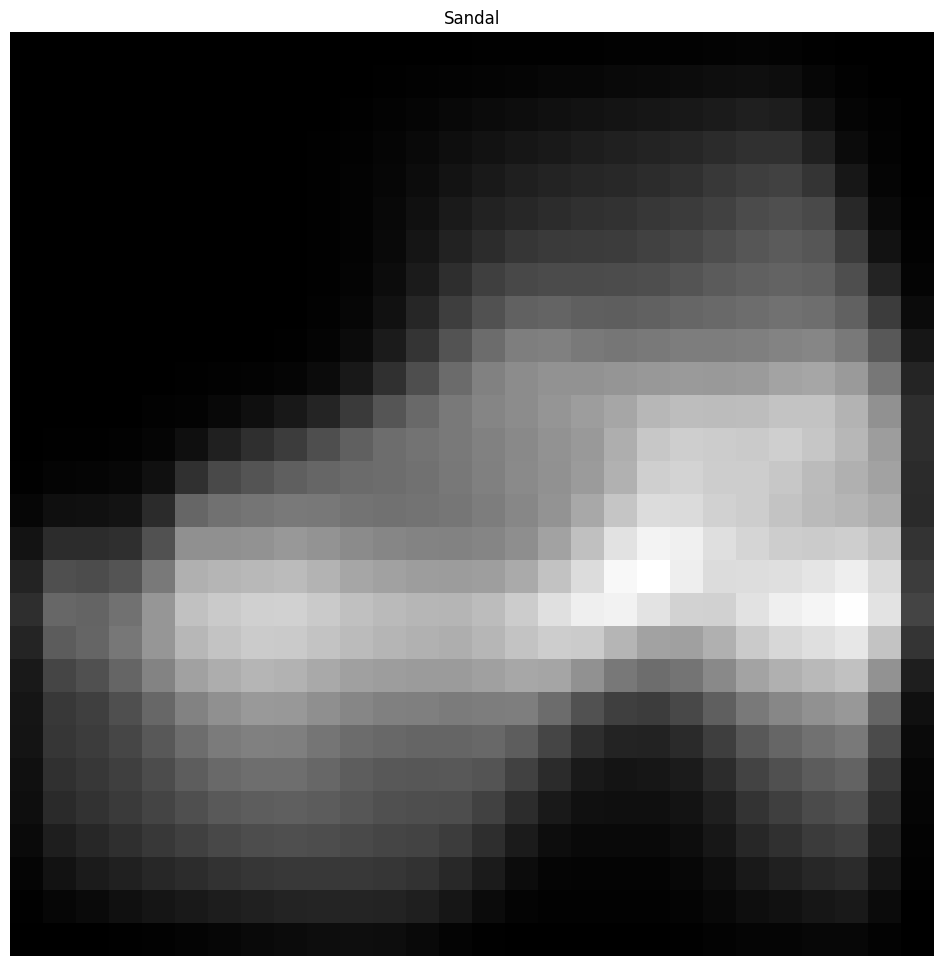

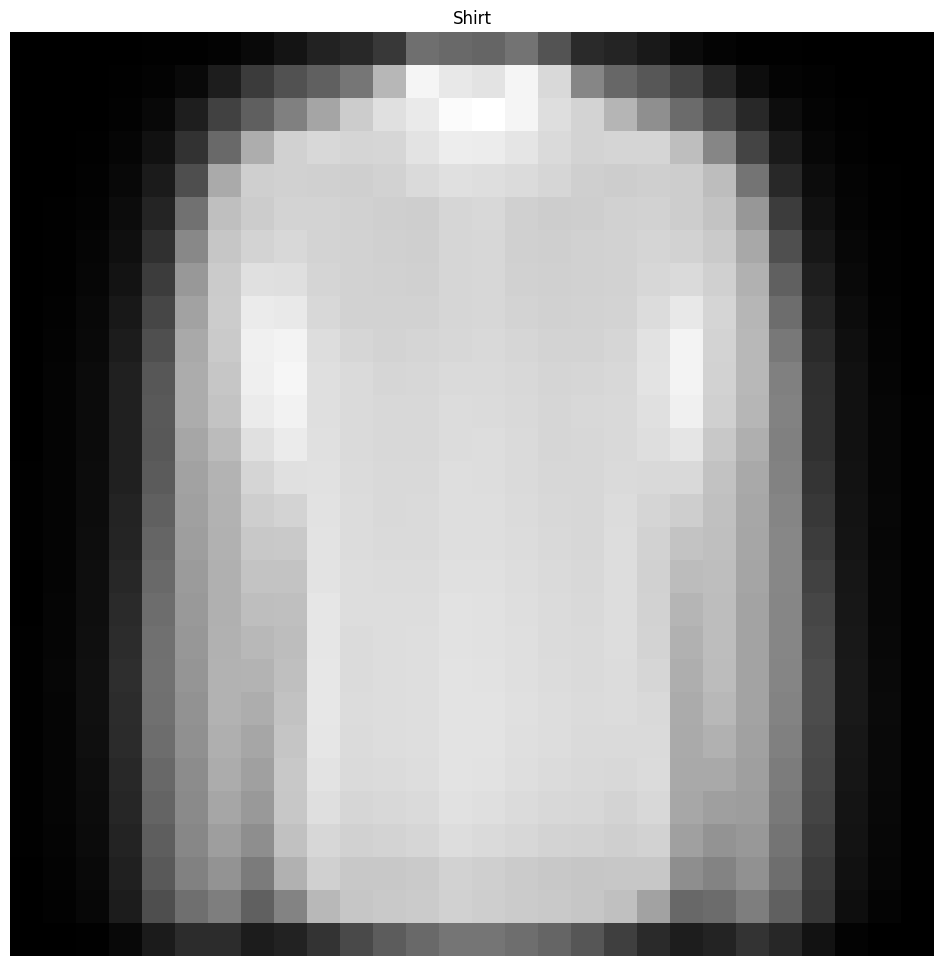

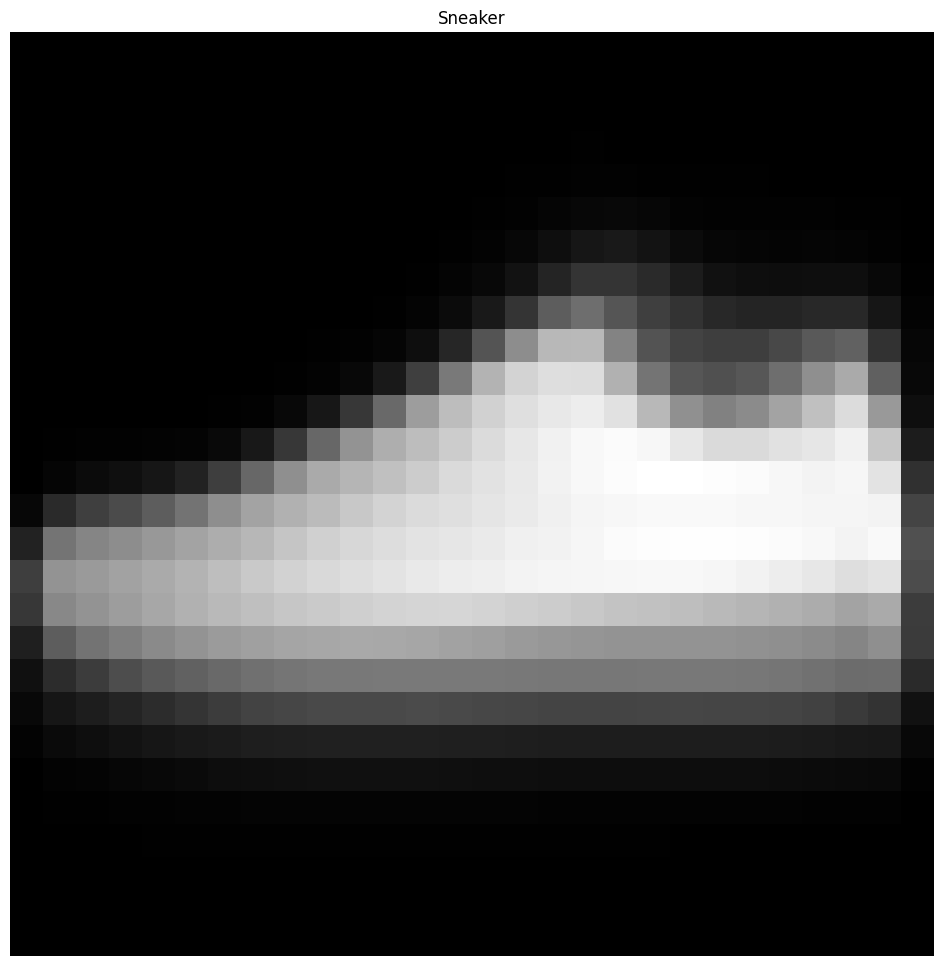

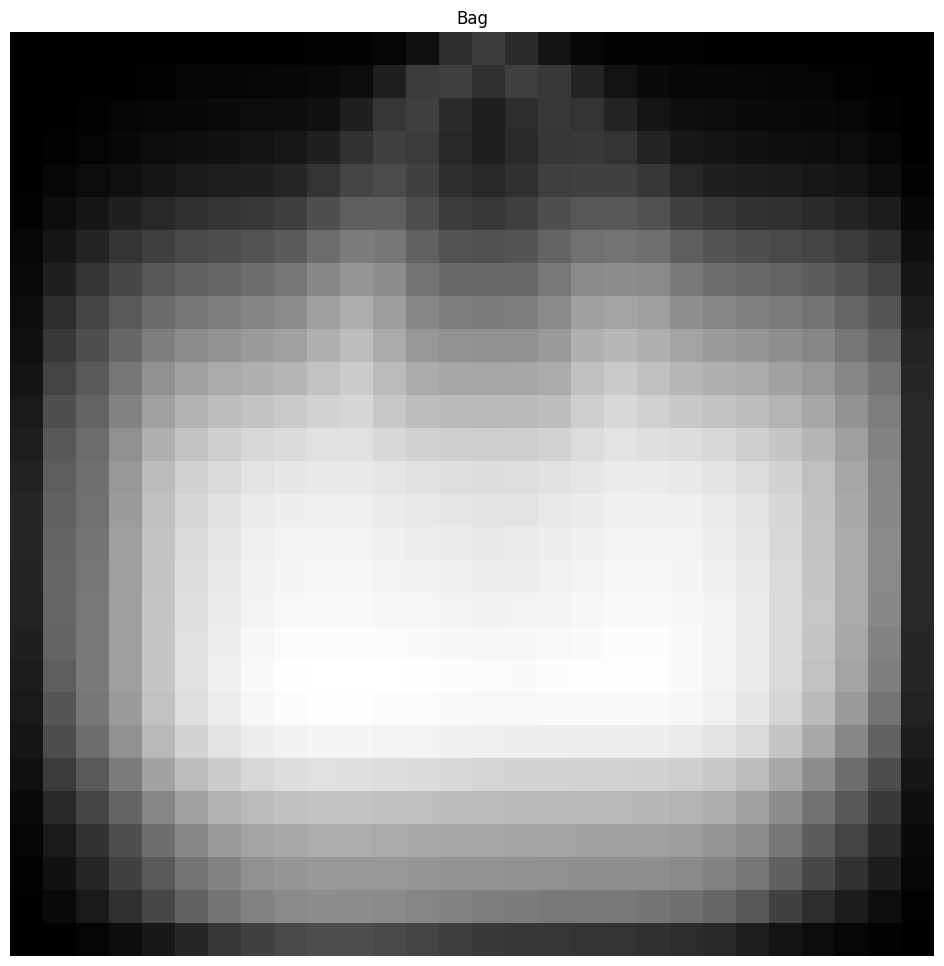

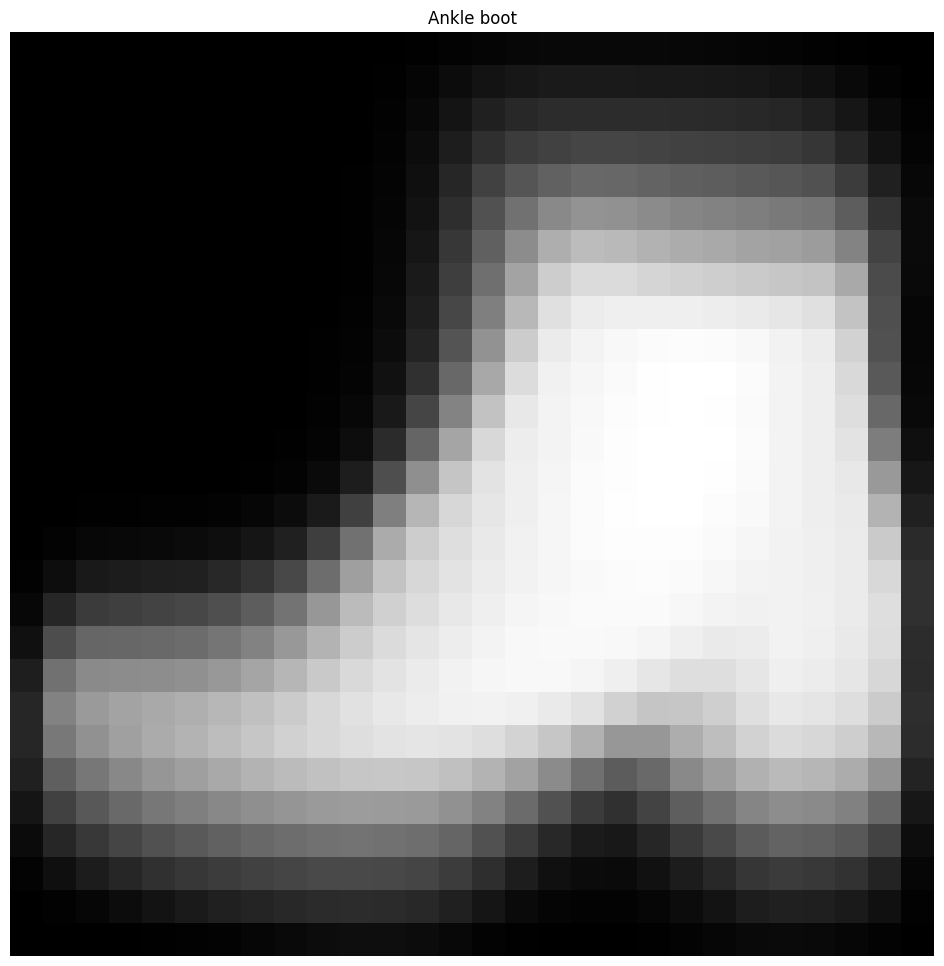

In [89]:
# Group the DataFrame by label and compute the mean of each group
average_images = X.groupby(y).mean()

for i, (label, avg_image) in enumerate(average_images.iterrows()):
    fig = plt.figure(figsize = (12,12)) 
    ax = fig.add_subplot(111)
    avg_image = avg_image.values.reshape(28, 28)
    ax.imshow(avg_image, cmap='gray')
    ax.set_title(label_names[label])
    ax.axis('off')
plt.show()

# Splitting the Data

In [90]:
X_train = train.drop('label', axis=1)
y_train = train['label']

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=0)

X_test = test.drop('label', axis=1)
y_test = test['label']

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((51000, 784), (51000,), (9000, 784), (9000,), (10000, 784), (10000,))

# Modeling

We will be using a fully-connected feedforward neural network using Keras and Tensorflow.

In [91]:
model = Sequential([
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

In [122]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


## Define the Loss Function, Optimizer and Metrics

In [93]:
model.compile(optimizer="rmsprop",  # RMSProp is discussed in the Optimizers section
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

## Training the model

In [94]:
X_train.shape

(51000, 784)

In [95]:
X_train.shape

(51000, 784)

In [96]:
model.fit(X_train, y_train, epochs=15, batch_size=128)

Epoch 1/15


399/399 [==============================] - 5s 11ms/step - loss: 10.6284 - accuracy: 0.6988
Epoch 2/15
399/399 [==============================] - 5s 11ms/step - loss: 0.7051 - accuracy: 0.7890
Epoch 3/15
399/399 [==============================] - 5s 11ms/step - loss: 0.5248 - accuracy: 0.8218
Epoch 4/15
399/399 [==============================] - 5s 12ms/step - loss: 0.4738 - accuracy: 0.8357
Epoch 5/15
399/399 [==============================] - 5s 12ms/step - loss: 0.4567 - accuracy: 0.8474
Epoch 6/15
399/399 [==============================] - 5s 12ms/step - loss: 0.4385 - accuracy: 0.8512
Epoch 7/15
399/399 [==============================] - 5s 12ms/step - loss: 0.4277 - accuracy: 0.8581
Epoch 8/15
399/399 [==============================] - 5s 12ms/step - loss: 0.4201 - accuracy: 0.8607
Epoch 9/15
399/399 [==============================] - 5s 12ms/step - loss: 0.4146 - accuracy: 0.8635
Epoch 10/15
399/399 [==============================] - 5s 12ms/step - loss: 0.4071 - accuracy: 0.8660

# Evaluation

In [97]:
y_valid_pred = model.predict(X_valid)

282/282 [==============================] - 1s 2ms/step


In [98]:
# Get the maximum predicted probability for each sample
max_probs = np.max(y_valid_pred, axis=1)

# Convert the model's probability outputs to class labels
y_valid_pred_labels = np.argmax(y_valid_pred, axis=1)

df = pd.DataFrame({
    'Probability of predicting the predicted label': max_probs,
    'Actual prediction by the model': y_valid_pred_labels,
    'Ground truth': y_valid
})

display(df)

Probability of predicting the predicted label   
3048                                        1.000000  \
19563                                       0.999862   
58303                                       0.999611   
8870                                        0.801422   
40228                                       0.703006   
...                                              ...   
30581                                       0.809435   
46746                                       0.993556   
9069                                        0.996060   
25232                                       0.999992   
27183                                       0.795361   

       Actual prediction by the model  Ground truth  
3048                                1             1  
19563                               6             6  
58303                               8             8  
8870                                7             7  
40228                               0             0  
...                               ...           ...  
30581                               2             2  
46746                               8             8  
9069                                9             9  
25232                               9             9  
27183                               2             2  

[9000 rows x 3 columns]

## Accuracy

In [99]:
accuracy = accuracy_score(y_valid, y_valid_pred_labels)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8235555555555556


# Confusion Matrix

In [100]:
conf_mat = confusion_matrix(y_valid, y_valid_pred_labels)
print(f'Confusion matrix:\n {conf_mat}')

Confusion matrix:
 [[785   1  28  24   0   0  46   0   4   0]
 [  0 863  10  14   0   0   0   0   0   0]
 [  8   0 876  10   7   0  13   0   0   0]
 [ 17   9  20 904   6   0   7   0   0   0]
 [  1   0 520  91 248   0  20   0   0   0]
 [  3   0   0   2   0 860   3  10   4  21]
 [182   3 283  28  32   0 369   0   6   0]
 [  0   1   0   1   0  21   5 788   2  40]
 [  8   1  15   3   0   5  26   3 859   1]
 [  0   0   0   0   0   4   1  15   3 860]]


# Precision, Recall and F1

In [101]:
report_df = pd.DataFrame(classification_report(y_valid, y_valid_pred_labels, output_dict=True)).T   
display(report_df)

precision    recall  f1-score      support
0              0.781873  0.884009  0.829810   888.000000
1              0.982916  0.972943  0.977904   887.000000
2              0.500000  0.958425  0.657164   914.000000
3              0.839369  0.938733  0.886275   963.000000
4              0.846416  0.281818  0.422847   880.000000
5              0.966292  0.952381  0.959286   903.000000
6              0.753061  0.408638  0.529792   903.000000
7              0.965686  0.918415  0.941458   858.000000
8              0.978360  0.932682  0.954975   921.000000
9              0.932755  0.973952  0.952909   883.000000
accuracy       0.823556  0.823556  0.823556     0.823556
macro avg      0.854673  0.822200  0.811242  9000.000000
weighted avg   0.853570  0.823556  0.811541  9000.000000

## Precision Recall Curve

We will use class 5 now because we will also be needing it later.

In [102]:
y_scores = y_valid_pred[:, 5]

y_valid_is_5 = (y_valid == 5)

In [103]:
precisions, recalls, thresholds = precision_recall_curve(y_valid_is_5, y_scores)

In [119]:
threshold = 0.4

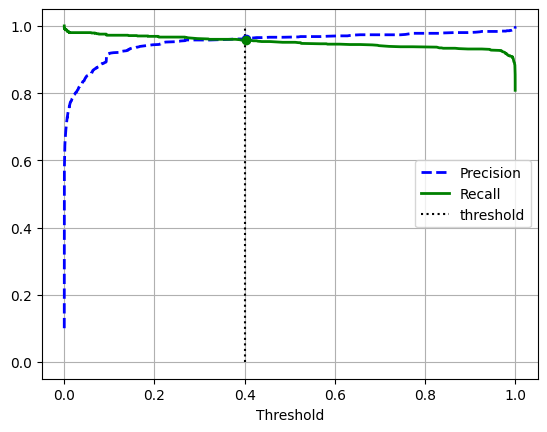

In [120]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)


plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")


plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.grid(True)
plt.show()

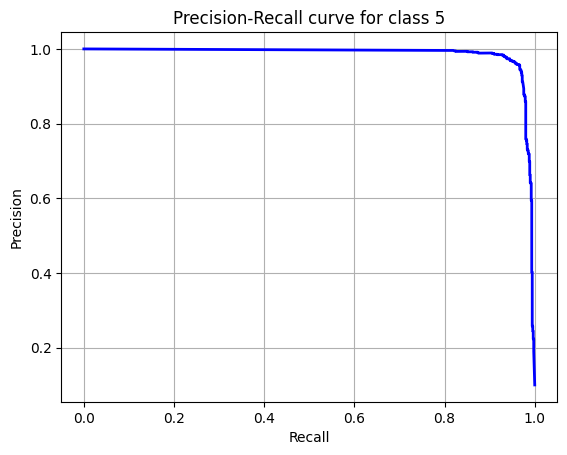

In [121]:
plt.plot(recalls, precisions, "b-", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.title('Precision-Recall curve for class 5')
plt.show()

## Test Set Evaluation

In [107]:
#predict the test set
y_test_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [108]:
max_probs = np.max(y_test_pred, axis=1)

y_test_pred_labels = np.argmax(y_test_pred, axis=1)

df = pd.DataFrame({
    'Probability of predicting the predicted digit': max_probs,
    'Actual prediction by the model': y_test_pred_labels,
    'Ground truth': y_test
})

# Display the DataFrame
display(df)

Probability of predicting the predicted digit   
0                                          0.947195  \
1                                          1.000000   
2                                          1.000000   
3                                          0.993131   
4                                          0.912154   
...                                             ...   
9995                                       0.928984   
9996                                       0.826120   
9997                                       1.000000   
9998                                       0.666164   
9999                                       0.700945   

      Actual prediction by the model  Ground truth  
0                                  0             0  
1                                  1             1  
2                                  2             2  
3                                  2             2  
4                                  3             3  
...                              ...           ...  
9995                               0             0  
9996                               6             6  
9997                               8             8  
9998                               8             8  
9999                               2             1  

[10000 rows x 3 columns]

## Accuracy

In [109]:
accuracy = accuracy_score(y_test, y_test_pred_labels)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8203


## Confusion Matrix

In [110]:
conf_mat = confusion_matrix(y_test, y_test_pred_labels)
print(f'Confusion matrix:\n {conf_mat}')

Confusion matrix:
 [[856   0  47  24   0   1  66   0   6   0]
 [  2 979   8  11   0   0   0   0   0   0]
 [ 11   2 942  15   9   0  20   0   1   0]
 [ 15  15  25 928   4   0  12   0   0   1]
 [  0   2 591  76 303   0  27   0   1   0]
 [  0   0   1   2   0 942   0  22   6  27]
 [201   3 282  34  38   0 438   0   4   0]
 [  0   0   0   0   0  33  11 891   2  63]
 [  7   0  14   4   1   3  24   1 945   1]
 [  0   0   0   1   0   3   0  17   0 979]]


## Precision, Recall and F1

In [111]:
# Compute precision, recall, F1-score
report = classification_report(y_test, y_test_pred_labels)
report_df = pd.DataFrame(classification_report(y_test, y_test_pred_labels, output_dict=True)).T
display(report_df)

precision  recall  f1-score     support
0              0.783883  0.8560  0.818356   1000.0000
1              0.978022  0.9790  0.978511   1000.0000
2              0.493194  0.9420  0.647423   1000.0000
3              0.847489  0.9280  0.885919   1000.0000
4              0.853521  0.3030  0.447232   1000.0000
5              0.959267  0.9420  0.950555   1000.0000
6              0.732441  0.4380  0.548185   1000.0000
7              0.957035  0.8910  0.922838   1000.0000
8              0.979275  0.9450  0.961832   1000.0000
9              0.914099  0.9790  0.945437   1000.0000
accuracy       0.820300  0.8203  0.820300      0.8203
macro avg      0.849823  0.8203  0.810629  10000.0000
weighted avg   0.849823  0.8203  0.810629  10000.0000

## Increasing Precision and Recall

To increase precision or recall without retraining the model, we can adjust the decision threshold. By default, the threshold is 0.5 for binary classification: probabilities above 0.5 are classified as positive, and those below are classified as negative. If we decrease the threshold, we can classify more samples as positive, which will increase recall which may decrease precision. If we increase the threshold, we'll classify fewer samples as positive, which will increase precision but may decrease recall.

In [112]:
y_scores = y_test_pred[:, 5]

y_test_is_5 = (y_test == 5)

Let's see this in action.

In [113]:
high_threshold = 0.90
y_pred_high_threshold = (y_scores > high_threshold)
high_precision = precision_score(y_test_is_5, y_pred_high_threshold)
new_recall = recall_score(y_test_is_5, y_pred_high_threshold)
print(f'Precision with high threshold: {high_precision}')
print(f'Recall with high threshold: {new_recall}')

Precision with high threshold: 0.9818763326226013
Recall with high threshold: 0.921


In [114]:
# Choose a lower threshold to increase recall
low_threshold = 0.3
y_pred_low_threshold = (y_scores > low_threshold)
high_recall = recall_score(y_test_is_5, y_pred_low_threshold)
new_precision = precision_score(y_test_is_5, y_pred_low_threshold)
print(f'Recall with low threshold: {high_recall}')
print(f'Precision with low threshold: {new_precision}')

Recall with low threshold: 0.95
Precision with low threshold: 0.95


For our test set, we initally had a precision score of `0.959` and a recall score of `0.942`. But as you can see, by increasing our threshold, we were able to raise the precision score to `0.981`, and then when we reduced the threshold, we increased our recall score to `0.95`.